<a href="https://colab.research.google.com/github/Sara102006/SKT_ML_3/blob/main/SKT_ML_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.592QCK_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
Model Accuracy: 0.6575

Upload an image of a Cat or Dog:


Saving IMG20250414142140.jpg to IMG20250414142140.jpg


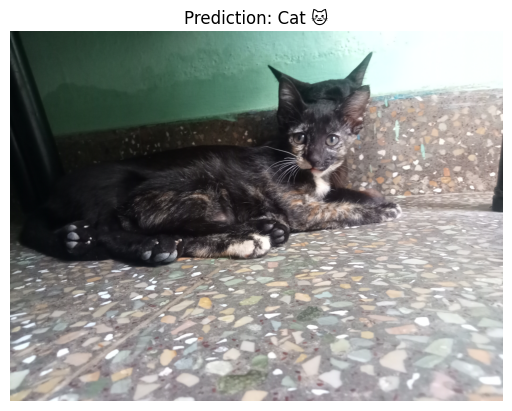

In [1]:
# Cats vs Dogs Classification using SVM

!pip install tensorflow-datasets scikit-image opencv-python

import tensorflow_datasets as tfds
import numpy as np
import cv2
import matplotlib.pyplot as plt

from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from google.colab import files

# Loading dataset
dataset = tfds.load(
    "cats_vs_dogs",
    split="train",
    as_supervised=True
)

# Feature Extraction
def extract_features(image):
    image = cv2.resize(image, (128, 128))
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    features = hog(
        gray,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        block_norm='L2-Hys'
    )
    return features

# Preparing Training Data
X = []
y = []

for img, label in dataset.take(2000):   # take only 2000 images
    img = img.numpy()
    X.append(extract_features(img))
    y.append(label.numpy())

X = np.array(X)
y = np.array(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Training SVM Model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Model Evaluation
y_pred = svm.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))

# Getting input
print("\nUpload an image of a Cat or Dog:")
uploaded = files.upload()

for filename in uploaded.keys():
    img = cv2.imread(filename)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    features = extract_features(img)
    prediction = svm.predict([features])[0]

    label = "Dog 🐶" if prediction == 1 else "Cat 🐱"

    # Displaying image and prediction
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"Prediction: {label}")
    plt.show()